# 直線近似

2変量のデータ分布の外観を散布図でみることができますが，
この分布に相関がある場合，散布図上に直線を描いてデータ分布を近似することができます．

実は，近似直線を求め方として，3つの方法があります．

- 回帰分析による回帰直線
- X軸とY軸を交換した回帰直線
- 主成分分析による第1固有ベクトル上の直線

単純なデータで，これらの近似の違いを確認します．
> 
<font face='courier new'>
(X,Y) = {(2,2), (4,5), (7,4), (9,6), (10,11)}
</font>

このデータを散布図にすると下図のようになります．
![散布図](./images/scatter.jpg)

### 回帰分析による回帰直線
この散布図にXを説明変数，Yを目的変数とした回帰分析による回帰直線を引いた図が下図です．
この図に示した赤い点線の長さの2乗和，すなわち，各点と直線とのY成分を最小にするような直線です．

![回帰直線](./images/normal_regression.jpg)

### XとYを交換した回帰分析による回帰直線
この散布図にYを説明変数，Xを目的変数とした回帰分析による回帰直線を引いた図が下図です．
この図に示した赤い点線の長さの2乗和，すなわち，各点と直線とのX成分を最小にするような直線です．

![逆回帰直線](./images/inverse_regression.jpg)

### 主成分分析による第1固有ベクトル上の直線
この散布図の第1固有ベクトルによる直線を引いた図が下図です．
この図に示した赤い点線の長さの2乗和，すなわち，各点から直線への推薦の長さを最小にするような直線です．
この直線が主成分分析における第1成分となるベクトルによって生成される直線です．

![固有ベクトル直線](./images/eigen_vector.jpg)

### 近似直線の比較

ここまで求めた3種類の近似曲線を同じ図に描画したもので下図です．

![近似直線](./images/approximate_lines.jpg)

このように，どの直線もデータの重心である（X平均値, Y平均値）を通っています．
各直線の比較として，回帰直線は水平に近くなり，XとYを入替えた回帰直線は垂直に近くなります．
第1固有ベクトルによる直線は変量XとYを公平に扱っています．

### 近似直線の選択基準

3種類の近似直線のどれにするかは，次のような基準で決めます．

| 近似直線 | 選択理由 |
|:---:|:---:|
| 通常の回帰直線 | Xを与えて，変化したYを測定する場合 |
| 変数を逆にした回帰直線 | Yを与えて，変化したXを測定する場合 |
| 第一固有ベクトル | X,Yともに独立した測定値の場合 |

したがって，因果関係が不明な変量X,Yについて近似直線を引く場合，第一固有ベクトルが無難な方法です．

*****
## Pythonによる近似直線

Pythonで近似直線を描画する方法を学習します．

必要なライブラリーを搬入します．
回帰分析は <font color='green'>sklearn.linear_model</font>を使用します．
固有ベクトルについては，NumPyの関数で対応します．

```Python
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
```

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

### データの準備

データをリスト配列で用意して，データフレームを作成します．

```Python
df = pd.DataFrame({
    'x':[11,18,33,45,56,60,68,78,91,99],
    'y':[14,16,44,66,33,80,87,58,85,97]})
df
```

In [2]:
df = pd.DataFrame({
    'x':[11,18,33,45,56,60,68,78,91,99],
    'y':[14,16,44,66,33,80,87,58,85,97]})
df

,x,y
0,11,14
1,18,16
2,33,44
3,45,66
4,56,33
5,60,80
6,68,87
7,78,58
8,91,85
9,99,97


### 相関係数

変量 x と y の相関係数を確認します．

```Python
df.x.corr(df.y)
```

In [3]:
df.x.corr(df.y)

0.8588415647980604

この相関係数を見ると，変量 x と y は強い正の相関があることが分かります．

グラフのタイトルに相関係数の値を記載するので，相関係数の桁数を丸めて文字列に変換した変数を用意します．

```Python
corrXY = str(round(float(df.x.corr(df.y)),3))
corrXY
```

In [4]:
corrXY = str(round(float(df.x.corr(df.y)),3))
corrXY

'0.859'

### 線形回帰による直線

線形回帰モデルは，sklearn.linear_modelライブラリーのLinearRegression()関数によってオブジェクトを用意します．

> <font face='courier new' color='green'>reg1 = linear_model.LinearRegression()</font>

この関数を実行した結果は，回帰モデルのオブジェクトが生成されるだけで，回帰モデルは未だ構築されていません．
このオブジェクトを変数 reg1 に代入して使用します．

線形回帰モデルを構築するには，fit()メソッドに説明変数と目的変数を与える必要があります．

> <font face='courier new'>reg1.fit(*X*, *Y*)</font>

ここでXは説明変数，Yは目的変数です．

ここでは単回帰分析なので説明変数は1変量ですが，重回帰分析の場合は多変量になります．
そのため，説明変数である変数 **X** は2重配列でなければなりません．
そこで，NumPyのreshape()メソッドを用いて，データフレームの列を2重配列にフォーマット変換します．

このrehape()メソッドの引数には配列の次元を指定します．
例えば，2行3列にする引数は \[2,3\] とします．
今回の引数 \[-1,1\] に指定した -1 は，特殊な指定で，他の次元に合わせて行のサイズを決めることを意味します．
すなわち，n行1列の指定となります．

```Python
df.x.values.reshape([-1,1])
```

In [5]:
df.x.values.reshape([-1,1])

array([[11],
       [18],
       [33],
       [45],
       [56],
       [60],
       [68],
       [78],
       [91],
       [99]], dtype=int64)

この変換結果を変数 X1 に代入します．

> <font face='courier new' color='green'>X1 = df.x.values.reshape([-1,1])</font>

この変数 X1 をfit()メソッドの説明変数として使用します．
目的変数は，df.y.values をそのまま使用できます．

> <font face='courier new' color='green'>reg1.fit(X1,df.y.values)</font>

回帰モデルが生成されたら，そのモデルを用いて回帰直線のための予測値を計算します．
予測値は predict()メソッドによって求まります．

> <font face='courier new' color='green'>Y1 = reg1.predict(X1)</font>

以上の結果で生成されたX1とY1とを用いて直線を描画します．

以上のプログラムをまとめて，Codeセルに記載します．

```Python
reg1 = linear_model.LinearRegression()
X1 = df.x.values.reshape([-1,1])
reg1.fit(X1,df.y.values)
Y1 = reg1.predict(X1)
```

In [6]:
reg1 = linear_model.LinearRegression()
X1 = df.x.values.reshape([-1,1])
reg1.fit(X1,df.y.values)
Y1 = reg1.predict(X1)

### XとYを交換した線形回帰による直線

この手順は上記と同じです．
ただし，XとYを入替えている点に注意します．
この結果として求まるX2とY2を用いて直線を描画します．

```Python
reg2 = linear_model.LinearRegression()
Y2 = df.y.values.reshape([-1,1])
reg2.fit(Y2,df.x.values)
X2 = reg2.predict(Y2)
```

In [7]:
reg2 = linear_model.LinearRegression()
Y2 = df.y.values.reshape([-1,1])
reg2.fit(Y2,df.x.values)
X2 = reg2.predict(Y2)

### 第1固有ベクトルによる直線

求めるものは，データの関連性を示す分散共分散行列の固有ベクトルです．
まず，変量XとYの分散共分散行列をNumPyの<font color='green'>np.cov()</font>関数によって求めます．

> <font face='courier new' color='green'>covMatrix = np.cov(dataX,dataY,bias=True)</font>

この関数に2つの変量を引き数として渡しています．  
オプションのパラメータとして <font color='green'>bias=True</font> を渡していますが，
この場合は分散の分母がデータ件数 n になります．
デフォルトは bias=False でその場合は分散の分母が n-1 となり不偏分散を表します．

```Python
covMatrix = np.cov(df.x.values,df.y.values,bias=True)
covMatrix
```

In [8]:
covMatrix = np.cov(df.x.values,df.y.values,bias=True)
covMatrix

array([[783.69, 686.8 ],
       [686.8 , 816.  ]])

この分散共分散行列の固有値と固有ベクトルを求めるには，NumPyの<font color='green'>np.linalg.eig()</font>関数を使用します．

> <font face='courier new' color='green'>eigen_values,eigen_vectors = np.linalg.eig(covMatrix)</font>

この関数の引数に分散共分散行列の2次元配列を渡しています．
返り値は，固有値と固有ベクトルのベアが返ってきますので，2つの変数 eigen_values と eigen_vectors に別々に格納します．

```Python
eigen_values,eigen_vectors = np.linalg.eig(covMatrix)
eigen_values
```

In [9]:
eigen_values,eigen_vectors = np.linalg.eig(covMatrix)
eigen_values

array([ 112.85502626, 1486.83497374])

変数 eigen_values に入っている固有値の値が2個あることが分かります．
変数 eigen_vectors に入っている固有ベクトルは，eigen_values にある固有値の並び順に対応して格納されています．
第1固有ベクトルは，大きい方の固有値に対応する固有ベクトルですので，第1固有ベクトルは次の値になります．

|最大の固有値|<font face='courier new'>eigne_values[0]</font>|<font face='courier new'>eigen_values[1]</font>|
|:---:|:---:|:---:|
|**第1固有ベクトルのX成分**|<font face='courier new'>eigen_vectors[0,0]</font> | <font face='courier new'>eigen_vetors[0,1]</font> |
|**第1固有ベクトルのY成分**|<font face='courier new'>eigen_vectors[1,0]</font> | <font face='courier new'>eigen_vetors[1,1]</font> |

この情報から直線の傾きは，固有ベクトルの（Y成分／X成分）で求まります．  
条件分けして直線の傾きを計算して変数 coef に代入します．

```Python
if eigen_values[0] > eigen_values[1]:
    coef = eigen_vectors[1,0]/eigen_vectors[0,0]
else:
    coef = eigen_vectors[1,1]/eigen_vectors[0,1]
coef
```

In [10]:
if eigen_values[0] > eigen_values[1]:
    coef = eigen_vectors[1,0]/eigen_vectors[0,0]
else:
    coef = eigen_vectors[1,1]/eigen_vectors[0,1]
coef

1.0237987387072784

近似直線はデータの重心を通るので，直線の方程式にXの平均値を入れたらYの平均値が求まらなければなりません．
この条件によって直線の方程式の定数項も決定します．

> $$ Y = {\alpha}X + (\mu_y - {\alpha}\mu_x) $$

データ範囲に合うようにX軸の値を適当に採用して2重配列を作り，変数X3に代入します．
このX3を直線の計算式に代入してYの値の配列を求め，変数Y3に代入します．

```Python
X3 = [5,95]
Y3 = [coef*a+df.y.mean()-coef*df.x.mean() for a in X3]
```

In [11]:
X3 = [5,95]
Y3 = [coef*a+df.y.mean()-coef*df.x.mean() for a in X3]

以上で，3種類の近似直線のデータが求まりました．

- (X1,Y1)：回帰分析による直線
- (X2,Y2)：XとYを交換した回帰分析による直線
- (X3,Y3)：主成分分析による第1固有ベクトル上の直線

### グラフの描画

グラフの描画では次の関数を使用します．

- <font face='courier new' color='green'>plt.plot</font>：直線の描画
- <font face='courier new' color='green'>plt.scatter</font>：散布点の描画
- <font face='courier new' color='green'>plt.title</font>：図タイトルの設定
- <font face='courier new' color='green'>plt.xlabel</font>：X軸ラベルの設定
- <font face='courier new' color='green'>plt.ylabel</font>：Y軸ラベルの設定
- <font face='courier new' color='green'>plt.axis</font>：縦横比の設定
- <font face='courier new' color='green'>plt.legend</font>：凡例の表示
- <font face='courier new' color='green'>plt.show</font>：図の表示


#### 直線の描画

直線の描画は，plot()関数に次のように引数を渡します．

> <font face='courier new' color='green'>plt.plot(*X*,*Y*,color='*color_name*',label='*any_text*')</font>

> - <font face='courier new' color='green'>*X*</font>：X軸データの配列
> - <font face='courier new' color='green'>*Y*</font>：Y軸データの配列
> - <font face='courier new' color='green'>color='*color_name*'</font>：色の名前，green, blue, red, gray, ...
> - <font face='courier new' color='green'>label='*any_text*'</font>：凡例に表示するテキスト

3本の直線についての引数は下表となります．

|直線の原理|X|Y|color|label|
|:---:|:---:|:---:|:---:|:---:|
|回帰分析による直線                       | df.x | Y1 | green | Normal regression |
|XとYを交換した回帰分析による直線         | X2 | df.y | blue | Inverse regression |
|分散共分散行列の第1固有ベクトルによる直線| X3 | Y3 | gray | Eigen vector |

#### 散布点の描画

散布点の描画は次の関数になります．

> <font face='courier new' color='green'>plt.scatter(df.x,df.y,label='data plot')</font>

scatter()関数のデータはデータフレームの2つの列をそのまま採用できます．

#### 全体の描画

3つの直線と散布点およびグラフ全体の表示を綺麗にする部分も含めたプログラムは，次のようになります．

```Python
# X based regression
plt.plot(df.x,Y1,color='green',label='Normal regression')
# Y based regression
plt.plot(X2,df.y,color='blue',label='Inverse regression')
# eigen vector fitting
plt.plot(X3,Y3,color='gray',label='Eigen vector')
# scatter
plt.scatter(df.x,df.y,label='data plot')
# decoration
plt.title('Correlation='+corrXY)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled') 
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
```

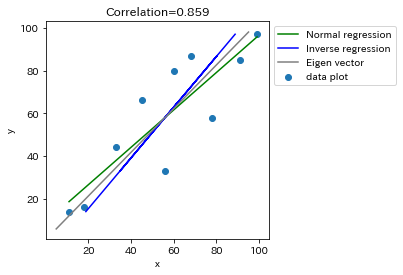

In [12]:
# X based regression
plt.plot(df.x,Y1,color='green',label='Normal regression')
# Y based regression
plt.plot(X2,df.y,color='blue',label='Inverse regression')
# eigen vector fitting
plt.plot(X3,Y3,color='gray',label='Eigen vector')
# scatter
plt.scatter(df.x,df.y,label='data plot')
# decoration
plt.title('Correlation='+corrXY)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('scaled') 
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

このように3通りの直線が，その意味合いによって異なる傾斜になることを理解してください．

単純に，直線近似＝回帰直線としてはいけません．

*****